# Chapter-4 : Q7

## Import libraries and load dataset

In [83]:
import pandas as pd
import numpy as np
import statistics, math
import matplotlib.pyplot as plt

path = "D:\IIT JODHPUR\Semester-3\ML for Business\Assignment-2"
dataset = "weekly_dataset.csv"
df = pd.read_csv(os.path.join(path, dataset))
df.head(10)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down
6,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,Up
7,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up
8,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up
9,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down


## Data Visualization

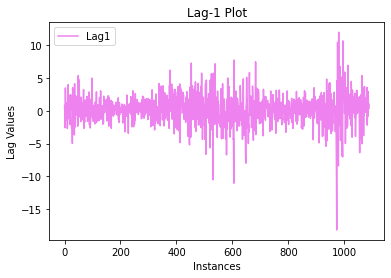

In [84]:
plt.plot(range(len(df)), df['Lag1'], color='violet', label='Lag1')
plt.legend()
plt.xlabel('Instances')
plt.ylabel('Lag Values')
plt.title('Lag-1 Plot')
plt.show()

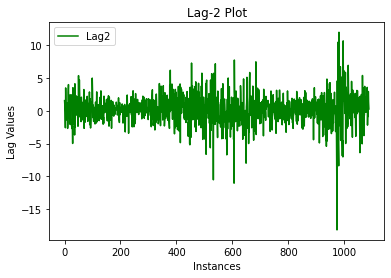

In [85]:
plt.plot(range(len(df)), df['Lag2'], color='green', label='Lag2')
plt.legend()
plt.xlabel('Instances')
plt.ylabel('Lag Values')
plt.title('Lag-2 Plot')
plt.show()

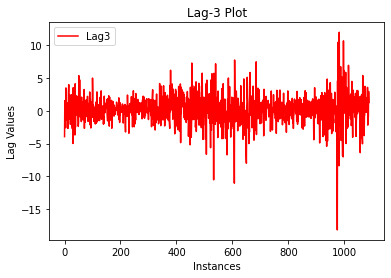

In [86]:
plt.plot(range(len(df)), df['Lag3'], color='red', label='Lag3')
plt.legend()
plt.xlabel('Instances')
plt.ylabel('Lag Values')
plt.title('Lag-3 Plot')
plt.show()

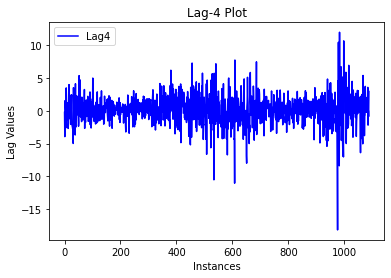

In [87]:
plt.plot(range(len(df)), df['Lag4'], color='blue', label='Lag4')
plt.legend()
plt.xlabel('Instances')
plt.ylabel('Lag Values')
plt.title('Lag-4 Plot')
plt.show()

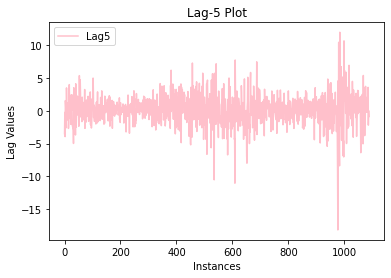

In [88]:
plt.plot(range(len(df)), df['Lag5'], color='pink', label='Lag5')
plt.legend()
plt.xlabel('Instances')
plt.ylabel('Lag Values')
plt.title('Lag-5 Plot')
plt.show()

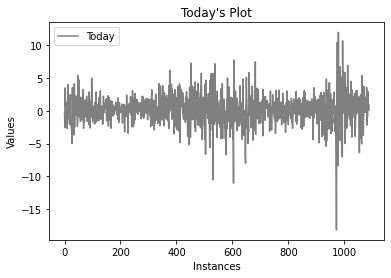

In [89]:
plt.plot(range(len(df)), df['Today'], color='gray', label='Today')
plt.legend()
plt.xlabel('Instances')
plt.ylabel('Values')
plt.title('Today\'s Plot')
plt.show()

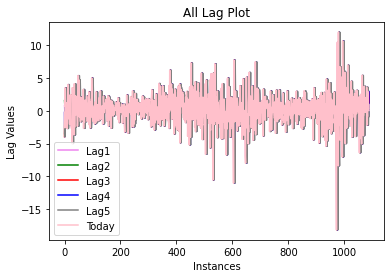

In [90]:
plt.plot(range(len(df)), df['Lag1'], color='violet', label='Lag1')
plt.plot(range(len(df)), df['Lag2'], color='green', label='Lag2')
plt.plot(range(len(df)), df['Lag3'], color='red', label='Lag3')
plt.plot(range(len(df)), df['Lag4'], color='blue', label='Lag4')
plt.plot(range(len(df)), df['Lag5'], color='gray', label='Lag5')
plt.plot(range(len(df)), df['Today'], color='pink', label='Today')
plt.legend()
plt.xlabel('Instances')
plt.ylabel('Lag Values')
plt.title('All Lag Plot')
plt.show()

## Data Preparation

In [91]:
new_df = df.drop('Year', axis=1)
new_df = new_df.drop('Today', axis=1)
new_df['Direction'] = new_df['Direction'].map({'Down' : 0, 'Up' : 1})
new_df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976,0
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574,0
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837,1
3,3.514,-2.576,-0.270,0.816,1.572,0.161630,1
4,0.712,3.514,-2.576,-0.270,0.816,0.153728,1


In [92]:
X = np.array([np.asarray(new_df.loc[i][:-1]) for i in range(len(new_df))])
y = np.array(new_df['Direction'])

split = 0.8
random_permutation = range(len(X))
train_size = math.ceil(len(X)*split)
test_size = math.ceil(len(X)*(1-split))

X_train = []
y_train = []
X_val = []
y_val = []

for i in random_permutation[:train_size]:
    X_train.append(X[i])
    y_train.append(y[i])
for i in random_permutation[train_size:train_size+test_size]:
    X_val.append(X[i])
    y_val.append(y[i])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
print(f"Train size : {len(X_train)}\tValidation size : {len(X_val)}")

Train size : 872	Validation size : 217


## Logistic Regression (using all Lag values & Volume as predictors)

In [93]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f"Model Summary :\nIntercept : {model.intercept_}\nFeature Coeff, : {model.coef_}\n")

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
print(f"Accuracy score on Validation set : {accuracy_score(y_pred=y_pred, y_true=y_val):.4f}\tF1 score : {f1_score(y_pred=y_pred, y_true=y_val, average='weighted'):.4f}\n")
print(f"Confusion Matrix : \n{confusion_matrix(y_pred=y_pred, y_true=y_val)}\n")
print(f"Classification Report : \n{classification_report(y_true=y_val, y_pred=y_pred)}\n")

Model Summary :
Intercept : [0.32243153]
Feature Coeff, : [[-0.03614264  0.03385739 -0.02246678 -0.03041501 -0.06545249 -0.07547277]]

Accuracy score on Validation set : 0.5207	F1 score : 0.5216

Confusion Matrix : 
[[53 46]
 [58 60]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.48      0.54      0.50        99
           1       0.57      0.51      0.54       118

    accuracy                           0.52       217
   macro avg       0.52      0.52      0.52       217
weighted avg       0.53      0.52      0.52       217




## Logistic Regression (using Lag-2 as predictor)

### Data preparation

In [94]:
X_train = []
y_train = []
X_val = []
y_val = []

for i in range(len(df)):
    if df.loc[i]['Year'] >= 2009:
        X_val.append(np.asarray(new_df.loc[i][:-1]))
        y_val.append(new_df.loc[i]['Direction'])
    else:
        X_train.append(np.asarray(new_df.loc[i][:-1]))
        y_train.append(new_df.loc[i]['Direction'])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
print(f"Train size : {len(X_train)}\tValidation size : {len(X_val)}")

Train size : 985	Validation size : 104


### Model

In [95]:
# Run the dataset preparation for safety
X_train = X_train[:, 1].reshape(-1, 1)
X_val = X_val[:, 1].reshape(-1, 1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f"Model Summary :\nIntercept : {model.intercept_}\nFeature Coeff, : {model.coef_}\n")

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
print(f"Accuracy score on Validation set : {accuracy_score(y_pred=y_pred, y_true=y_val):.4f}\tF1 score : {f1_score(y_pred=y_pred, y_true=y_val, average='weighted'):.4f}\n")
print(f"Confusion Matrix : \n{confusion_matrix(y_pred=y_pred, y_true=y_val)}\n")
print(f"Classification Report : \n{classification_report(y_true=y_val, y_pred=y_pred)}\n")

Model Summary :
Intercept : [0.20326236]
Feature Coeff, : [[0.05804742]]

Accuracy score on Validation set : 0.6250	F1 score : 0.5656

Confusion Matrix : 
[[ 9 34]
 [ 5 56]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.64      0.21      0.32        43
         1.0       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104




## Linear Discriminant Analysis

### Data preparation

In [96]:
X_train = []
y_train = []
X_val = []
y_val = []

for i in range(len(df)):
    if df.loc[i]['Year'] >= 2009:
        X_val.append(np.asarray(new_df.loc[i][:-1]))
        y_val.append(new_df.loc[i]['Direction'])
    else:
        X_train.append(np.asarray(new_df.loc[i][:-1]))
        y_train.append(new_df.loc[i]['Direction'])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
print(f"Train size : {len(X_train)}\tValidation size : {len(X_val)}")

Train size : 985	Validation size : 104


### Model

In [97]:
# Run the dataset preparation for safety
X_train = X_train[:, 1].reshape(-1, 1)
X_val = X_val[:, 1].reshape(-1, 1)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f"Model Summary :\nIntercept : {model.intercept_}\nFeature Coeff, : {model.coef_}\n")

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
print(f"Accuracy score on Validation set : {accuracy_score(y_pred=y_pred, y_true=y_val):.4f}\tF1 score : {f1_score(y_pred=y_pred, y_true=y_val, average='weighted'):.4f}\n")
print(f"Confusion Matrix : \n{confusion_matrix(y_pred=y_pred, y_true=y_val)}\n")
print(f"Classification Report : \n{classification_report(y_true=y_val, y_pred=y_pred)}\n")

Model Summary :
Intercept : [0.203424]
Feature Coeff, : [[0.05768451]]

Accuracy score on Validation set : 0.6250	F1 score : 0.5656

Confusion Matrix : 
[[ 9 34]
 [ 5 56]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.64      0.21      0.32        43
         1.0       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104




## Quadratic Discriminant Analysis

### Data preparation

In [98]:
X_train = []
y_train = []
X_val = []
y_val = []

for i in range(len(df)):
    if df.loc[i]['Year'] >= 2009:
        X_val.append(np.asarray(new_df.loc[i][:-1]))
        y_val.append(new_df.loc[i]['Direction'])
    else:
        X_train.append(np.asarray(new_df.loc[i][:-1]))
        y_train.append(new_df.loc[i]['Direction'])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
print(f"Train size : {len(X_train)}\tValidation size : {len(X_val)}")

Train size : 985	Validation size : 104


### Model

In [99]:
# Run the dataset preparation for safety
X_train = X_train[:, 1].reshape(-1, 1)
X_val = X_val[:, 1].reshape(-1, 1)

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f"Model Summary :\n{model.get_params()}\n")

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
print(f"Accuracy score on Validation set : {accuracy_score(y_pred=y_pred, y_true=y_val):.4f}\tF1 score : {f1_score(y_pred=y_pred, y_true=y_val, average='weighted'):.4f}\n")
print(f"Confusion Matrix : \n{confusion_matrix(y_pred=y_pred, y_true=y_val)}\n")
print(f"Classification Report : \n{classification_report(y_true=y_val, y_pred=y_pred)}\n")

Model Summary :
{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}

Accuracy score on Validation set : 0.5865	F1 score : 0.4337

Confusion Matrix : 
[[ 0 43]
 [ 0 61]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        43
         1.0       0.59      1.00      0.74        61

    accuracy                           0.59       104
   macro avg       0.29      0.50      0.37       104
weighted avg       0.34      0.59      0.43       104




c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,